# House Pricing Prediction Model

# 1. Defining the Question

## a) Specifying the question

Hass Consulting Company are real estate agents offering property to buy, rent and valuation and management services. 

As a data scientist working for the company, I will be studying the factors that affect house pricing using the given data in order to build a model that accurately predicts the price upon provision of the predictor variables.

## b) Defining the metric of success

The prediction will be considered successful upon building a regression model that gives the least mean squared error.

The lower the MSE the more accurate the predictions will be.

## c) Understanding the context

The project is based on data gotten from the consulting company which has been in existence for over 25 years. This data has been collected over the past few months so it is recent enough to be useful in training the model to make accurate predictions. 

## d) Recording the experimental design

For this project, I will be using the following 5 regression models. This will allow me to assess the suitability of each of the models and their appropriateness in solving the given problem. 



1.  Multiple linear regression
2.  Quantile regression
3.  Ridge regression
4.  Lasso regression
5.  Elastic Net regression




## e) Data relevance

The data provided has been collected over the past few months and is relevant and sufficient for this project. 



# 2. Reading the Data

In [0]:
# Importing all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
# Load the datasets

house = pd.read_csv('/content/Independent Project Week 7 - house_data.csv')
house  

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# 3. Checking the Data

In [3]:
# Determine the no of records in the dataset
house.shape

(21613, 20)

In [4]:
# Check datatypes of the columns

house.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
# Check the descriptive statistics

house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
# At a first glance, there are columns that have many 0's. 
# Check for the values in those columns to see how many 0's are there.

house.waterfront.value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [7]:
house.view.value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

In [8]:
house.yr_renovated.value_counts()

0       20699
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [9]:
house.sqft_basement.value_counts()

0       13126
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

In [10]:
house.zipcode.value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

# 4. External Data Source Validation

# 5. Tidying the Dataset

In [0]:
# Drop unnecessary columns
# I'll drop the id column and the columns that had many 0's

house.drop(['id', 'waterfront', 'view', 'yr_renovated', 'sqft_basement'], axis = 1, inplace = True) 

In [0]:
# I'll also drop lat and long because the zip code can indicate the location

house.drop(['lat', 'long'], axis = 1, inplace = True) 

In [13]:
# Check for missing values

house.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
condition        0
grade            0
sqft_above       0
yr_built         0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [0]:
# Drop missing values

house.dropna(inplace = True)

In [15]:
# Check if the changes have been made

house.isnull().any()

price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
condition        False
grade            False
sqft_above       False
yr_built         False
zipcode          False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [16]:
# Check for duplicated values

house.duplicated().any()

True

In [0]:
# Drop the duplicated columns

house.drop_duplicates(keep = False, inplace = True)

In [18]:
# Check whether changes have been made

house.duplicated().any()

False

In [19]:
# Check for outliers

# Find IQR Score first

Q1 = house.quantile(0.25)
Q3 = house.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

price            323500.00
bedrooms              1.00
bathrooms             0.75
sqft_living        1120.00
sqft_lot           5654.00
floors                1.00
condition             1.00
grade                 1.00
sqft_above         1020.00
yr_built             46.00
zipcode              85.00
sqft_living15       870.00
sqft_lot15         4984.00
dtype: float64


In [20]:
# Multiply the (IQR) by 1.5
# Add 1.5 x (IQR) to the third quartile. Any number greater than this is a suspected outlier.
# Subtract 1.5 x (IQR) from the first quartile. Any number less than this is a suspected outlier.

(house < (Q1 - 1.5 * IQR)) |(house > (Q3 + 1.5 * IQR))


# True indicates the prescence of an outlier

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,False,False,False,False,False,False,False,False,False,False,False,False,False
21609,False,False,False,False,False,False,False,False,False,False,False,False,False
21610,False,False,False,False,False,False,False,False,False,False,False,False,False
21611,False,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
# Remove the outliers

house_outliers = house[~((house < (Q1 - 1.5 * IQR)) |(house > (Q3 + 1.5 * IQR))).any(axis=1)]
house_outliers.shape

(16748, 13)

In [0]:
# Export the cleaned dataset

house_outliers.to_csv('house_clean.csv')

In [23]:
house_clean = pd.read_csv('house_clean.csv')
house_clean.head()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15
0,0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,1955,98178,1340,5650
1,1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,1951,98125,1690,7639
2,2,180000.0,2,1.00,770,10000,1.0,3,6,770,1933,98028,2720,8062
3,3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,1965,98136,1360,5000
4,4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,1987,98074,1800,7503


# 6. Exploratory Data Analysis

## Univariate Analysis

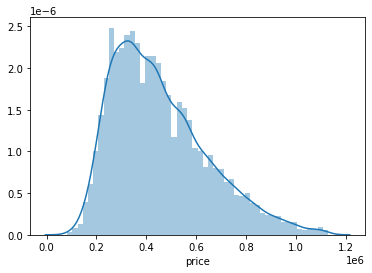

In [24]:
sns.distplot(house_clean["price"])

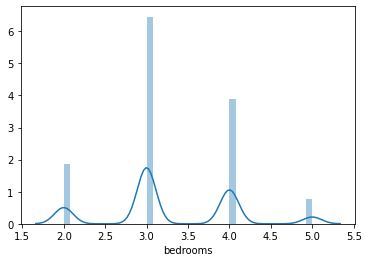

In [25]:
sns.distplot(house_clean["bedrooms"])

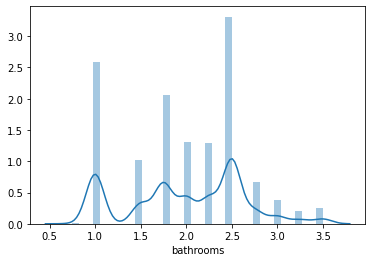

In [26]:
sns.distplot(house_clean["bathrooms"])

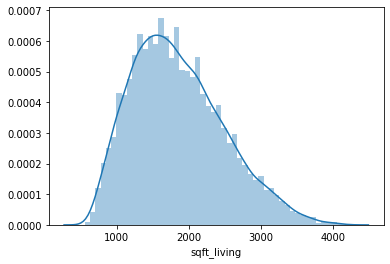

In [27]:
sns.distplot(house_clean["sqft_living"])

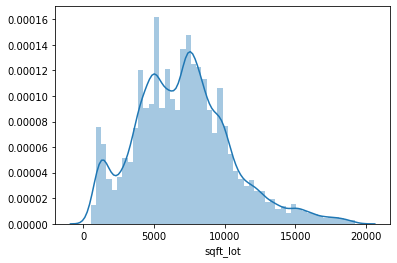

In [28]:
sns.distplot(house_clean["sqft_lot"])

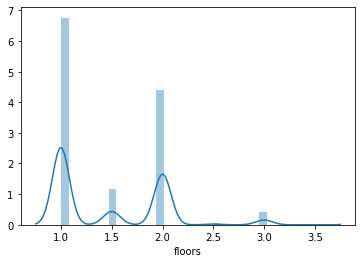

In [29]:
sns.distplot(house_clean["floors"])

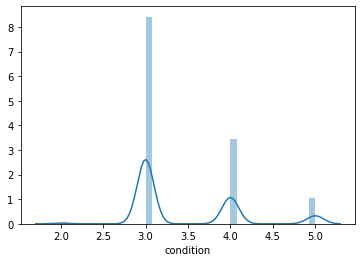

In [30]:
sns.distplot(house_clean["condition"])

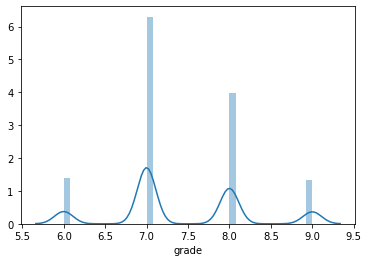

In [31]:
sns.distplot(house_clean["grade"])

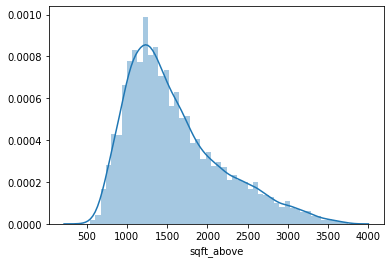

In [32]:
sns.distplot(house_clean["sqft_above"])

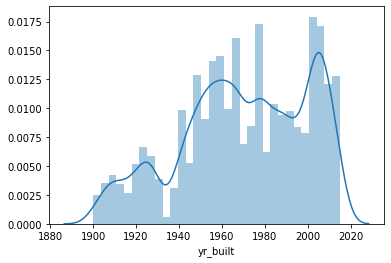

In [33]:
sns.distplot(house_clean["yr_built"])

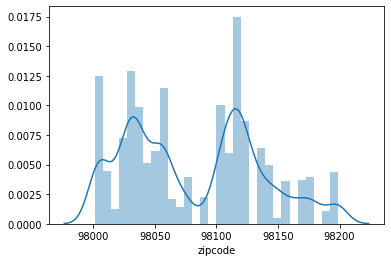

In [34]:
sns.distplot(house_clean["zipcode"])

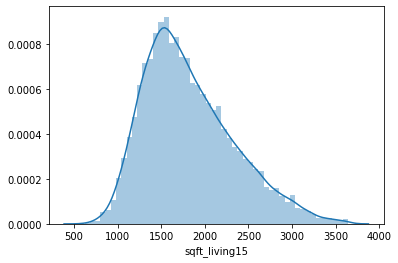

In [35]:
sns.distplot(house_clean["sqft_living15"])

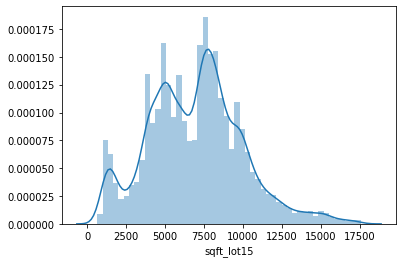

In [36]:
sns.distplot(house_clean["sqft_lot15"])

**Observation**

The distplots show how often each different value in a set of data occurs.
1. There are 3 popular zipcodes
2. Most of the houses were built after the year 2000
3. Most houses have a living area that is between 1000 and 2000 square feet
4. Most houses have 3 bedrooms

## Bivariate Analysis

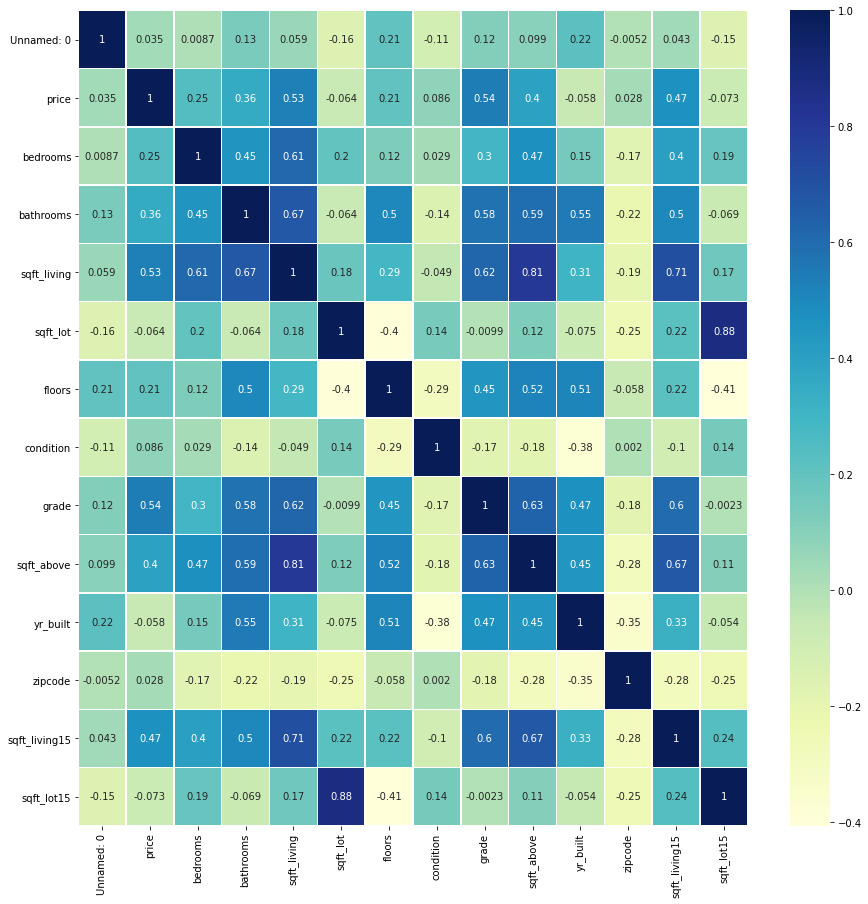

In [37]:
# Create a correlation matrix
correlation = house_clean.corr()
correlation


fig, ax = plt.subplots(figsize=(15, 15)) 
sns.heatmap(correlation, annot=True,  linewidths=.5, ax=ax, cmap="YlGnBu")

In [38]:
# Calculating the pearson coefficient
house_clean.corr() 

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15
Unnamed: 0,1.000000,0.035261,0.008697,0.134307,0.058622,-0.156612,0.207004,-0.105216,0.115044,0.098879,0.218556,-0.005204,0.043427,-0.154591
price,0.035261,1.000000,0.245738,0.355593,0.532952,-0.063678,0.207497,0.086216,0.538657,0.396333,-0.057888,0.027952,0.467799,-0.072957
bedrooms,0.008697,0.245738,1.000000,0.454270,0.610726,0.202921,0.122052,0.029135,0.296665,0.474195,0.148866,-0.170558,0.403175,0.191674
bathrooms,0.134307,0.355593,0.454270,1.000000,0.671250,-0.063906,0.504099,-0.143366,0.581036,0.589122,0.552637,-0.218891,0.500197,-0.069304
sqft_living,0.058622,0.532952,0.610726,0.671250,1.000000,0.184284,0.291004,-0.049228,0.624589,0.806437,0.305741,-0.192932,0.710888,0.165415
sqft_lot,-0.156612,-0.063678,0.202921,-0.063906,0.184284,1.000000,-0.400304,0.140321,-0.009938,0.122534,-0.075140,-0.247871,0.219995,0.877116
floors,0.207004,0.207497,0.122052,0.504099,0.291004,-0.400304,1.000000,-0.287592,0.449608,0.520583,0.512245,-0.057581,0.222818,-0.406430
condition,-0.105216,0.086216,0.029135,-0.143366,-0.049228,0.140321,-0.287592,1.000000,-0.173208,-0.179682,-0.375092,0.002008,-0.103587,0.143737
grade,0.115044,0.538657,0.296665,0.581036,0.624589,-0.009938,0.449608,-0.173208,1.000000,0.628802,0.467339,-0.183399,0.602584,-0.002300
sqft_above,0.098879,0.396333,0.474195,0.589122,0.806437,0.122534,0.520583,-0.179682,0.628802,1.000000,0.448949,-0.281396,0.674372,0.106660


**Observation**

1. sqft_above and sqft_living and sqft_living15 columns are highly correlated. 
2. sqft_lot and sqft_lot15 columns are highly correlated.

## Multivariate Analysis

In [0]:
# Divide the dataset into a feature set and corresponding labels. 

X = house_clean.iloc[:, 2:]
y = house_clean['price']

In [40]:
# Subject our features to LDA model

# Import Linear Discriminant Analysis method from sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Create an LDA object
lda = LDA()

# Fit the object onto X and y

lda1= lda.fit(X, y)
model = lda1.transform(X)

# Display the coeficients of the reducted columns
lda1.coef_

array([[ 1.27522505e+00, -1.17326340e+00, -3.87924203e-03, ...,
         2.53910839e-02, -2.30963574e-03,  1.09487998e-03],
       [-1.60262672e+00, -2.96081002e-01, -9.81092269e-04, ...,
        -3.61381080e-02, -2.10462033e-03, -1.62911192e-04],
       [ 1.19118483e+00, -1.90318405e+00, -1.78302875e-03, ...,
        -3.40266882e-02, -5.80625911e-03,  5.38402002e-04],
       ...,
       [ 5.61404741e-01, -2.98512639e-01,  5.90986774e-03, ...,
         1.05040096e-02, -1.73152528e-04, -2.68099675e-04],
       [-2.57982127e-02, -1.27998856e+00,  6.49869712e-03, ...,
         9.93804407e-03,  1.55222945e-03,  2.79030004e-04],
       [ 5.42997337e-01, -6.20631088e-02,  2.19433550e-03, ...,
         4.37788601e-03,  3.84501352e-03,  1.22943555e-04]])

In [41]:
coeff = pd.DataFrame(index = X.columns.values, data=lda1.coef_[0].T)
coeff.sort_values(0, ascending=False)

,0
bedrooms,1.275225
floors,0.726211
yr_built,0.062916
zipcode,0.025391
sqft_lot15,0.001095
sqft_above,0.000941
sqft_lot,-0.000132
sqft_living15,-0.002310
sqft_living,-0.003879
bathrooms,-1.173263


**Observation**

The number of bedrooms, floors, yr_built, zipcode, sqft_lot15 and sqft_above are the factors that can comfortably predict the prices of houses.


# 7. Multiple Linear Regression

## Hyperparameter Tuning

In [0]:
# Divide the data into attributes and labels

X = house_clean.iloc[:, 2:]
y = house_clean['price']

## Multicollinearity check

In [43]:
# Focus here is on the independent variables only
independent_variables = house_clean.drop(columns=['Unnamed: 0', 'price'])

# Let's display the correlations between the variables
a = independent_variables.corr()
a


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15
bedrooms,1.000000,0.454270,0.610726,0.202921,0.122052,0.029135,0.296665,0.474195,0.148866,-0.170558,0.403175,0.191674
bathrooms,0.454270,1.000000,0.671250,-0.063906,0.504099,-0.143366,0.581036,0.589122,0.552637,-0.218891,0.500197,-0.069304
sqft_living,0.610726,0.671250,1.000000,0.184284,0.291004,-0.049228,0.624589,0.806437,0.305741,-0.192932,0.710888,0.165415
sqft_lot,0.202921,-0.063906,0.184284,1.000000,-0.400304,0.140321,-0.009938,0.122534,-0.075140,-0.247871,0.219995,0.877116
floors,0.122052,0.504099,0.291004,-0.400304,1.000000,-0.287592,0.449608,0.520583,0.512245,-0.057581,0.222818,-0.406430
condition,0.029135,-0.143366,-0.049228,0.140321,-0.287592,1.000000,-0.173208,-0.179682,-0.375092,0.002008,-0.103587,0.143737
grade,0.296665,0.581036,0.624589,-0.009938,0.449608,-0.173208,1.000000,0.628802,0.467339,-0.183399,0.602584,-0.002300
sqft_above,0.474195,0.589122,0.806437,0.122534,0.520583,-0.179682,0.628802,1.000000,0.448949,-0.281396,0.674372,0.106660
yr_built,0.148866,0.552637,0.305741,-0.075140,0.512245,-0.375092,0.467339,0.448949,1.000000,-0.350641,0.325951,-0.054027
zipcode,-0.170558,-0.218891,-0.192932,-0.247871,-0.057581,0.002008,-0.183399,-0.281396,-0.350641,1.000000,-0.284280,-0.249800


In [44]:
pd.DataFrame(np.linalg.inv(a.values), index = a.index, columns=a.columns)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15
bedrooms,1.694600,-0.333876,-0.971253,-0.057053,0.015994,-0.034017,0.219388,-0.048488,0.114400,0.079560,0.093284,-0.116376
bathrooms,-0.333876,2.841722,-1.686554,0.060960,-0.684145,-0.126756,-0.230157,0.754255,-0.869053,0.100017,-0.052712,0.136239
sqft_living,-0.971253,-1.686554,5.657902,-0.212860,1.041367,-0.180040,-0.651135,-3.020940,0.557524,-0.411190,-0.916058,0.235806
sqft_lot,-0.057053,0.060960,-0.212860,4.540230,0.433932,0.023847,0.087399,-0.374205,0.108849,0.178972,0.149262,-3.703898
floors,0.015994,-0.684145,1.041367,0.433932,2.652092,0.077724,-0.316778,-1.751129,-0.423191,-0.183959,0.250322,0.520901
condition,-0.034017,-0.126756,-0.180040,0.023847,0.077724,1.237354,-0.001661,0.186038,0.492033,0.163682,0.100054,-0.115903
grade,0.219388,-0.230157,-0.651135,0.087399,-0.316778,-0.001661,2.215090,-0.140259,-0.338535,-0.064591,-0.601157,-0.026454
sqft_above,-0.048488,0.754255,-3.020940,-0.374205,-1.751129,0.186038,-0.140259,4.754914,-0.291436,0.385375,-0.604491,-0.131744
yr_built,0.114400,-0.869053,0.557524,0.108849,-0.423191,0.492033,-0.338535,-0.291436,2.145058,0.488336,0.012738,-0.247428
zipcode,0.079560,0.100017,-0.411190,0.178972,-0.183959,0.163682,-0.064591,0.385375,0.488336,1.335567,0.210934,0.072873


From the above table, the VIF of sqft_living is 5.03, sqft_lot has a score of 3.97, sqft_above has a score of 4.46, sqft_living15 has a score of 2.34 and sqft_lot15 has a score of 4.08.

I'll start by dropping the variables sqft_living and sqft_lot15 as they have a VIF greater than 4 to see the effect it has on the other variables. 

In [45]:
house_revised = independent_variables.drop(columns=['sqft_living', 'sqft_lot15'])

correlations = house_revised.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,bedrooms,bathrooms,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,sqft_living15
bedrooms,1.526611,-0.619966,-0.154938,0.202685,-0.066723,0.107624,-0.567169,0.205613,0.010468,-0.069787
bathrooms,-0.619966,2.329650,0.164440,-0.395297,-0.175527,-0.424284,-0.145988,-0.690633,-0.026620,-0.309946
sqft_lot,-0.154938,0.164440,1.545654,0.859057,-0.070542,0.063455,-0.492578,-0.088945,0.236255,-0.168444
floors,0.202685,-0.395297,0.859057,2.410547,0.122183,-0.197004,-1.194499,-0.497535,-0.117679,0.455530
condition,-0.066723,-0.175527,-0.070542,0.122183,1.229055,-0.022365,0.089770,0.503356,0.152732,0.062594
grade,0.107624,-0.424284,0.063455,-0.197004,-0.022365,2.140154,-0.487921,-0.274332,-0.111926,-0.706528
sqft_above,-0.567169,-0.145988,-0.492578,-1.194499,0.089770,-0.487921,3.141927,0.005899,0.165942,-1.094052
yr_built,0.205613,-0.690633,-0.088945,-0.497535,0.503356,-0.274332,0.005899,2.074095,0.534184,0.082257
zipcode,0.010468,-0.026620,0.236255,-0.117679,0.152732,-0.111926,0.165942,0.534184,1.303911,0.151259
sqft_living15,-0.069787,-0.309946,-0.168444,0.455530,0.062594,-0.706528,-1.094052,0.082257,0.151259,2.304940


All scores dropped, but the sqft_lot score dropped to 1.42 meaning it was correlated to the sqft_lot15 variable. The sqft_above score dropped to 3.11 showing it was highly correlated to the sqft_living variable.

## Model

In [0]:
# Divide the data into attributes and labels

X = house_revised.iloc[:, 0:]
y = house_clean['price']

In [0]:
# Dividing our data into training and test sets
# ---
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [48]:
# Fit the linear regression to the train set

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
# Check what coefficients the regression model has chosen

coeff_house = pd.DataFrame(reg.coef_, X.columns, columns=['Coefficient'])
coeff_house.sort_values("Coefficient", ascending = False)

,Coefficient
grade,111510.451480
bathrooms,52116.985824
condition,27534.810762
floors,8264.485465
zipcode,180.049665
sqft_living15,90.639731
sqft_above,23.098433
sqft_lot,-7.618696
bedrooms,-2589.872550
yr_built,-2974.283811


In [50]:
# Do predictions

y_pred = reg.predict(X_test)

# Compare the actual output values for X_test with the predicted values

prediction = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
prediction


,Actual,Predicted
1172,360000.0,653378.914275
3775,300000.0,465442.954051
6303,339950.0,217117.290557
2619,553650.0,463526.787944
4063,405000.0,228924.551583
...,...,...
11633,759000.0,368558.249566
2907,411000.0,589225.385072
12783,345000.0,337504.117739
2466,395000.0,507339.451077


In [51]:
# Evaluate the algorithm

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 105608.22764905695
Mean Squared Error: 18697815082.36405
Root Mean Squared Error: 136739.95422832368


We can see that the value of root mean squared error is 136870.95
which is greater than 10% of the mean value of price of houses.

This means that our algorithm was not very accurate but can still make reasonably good predictions.  

I'll do cross validation of the model using k-fold cross validation

## Cross validation

In [52]:
# using k-fold cross validation
from sklearn.model_selection import KFold

# Define our X and y

X2 = house_revised.iloc[:, 0:].values
y2 = house_clean['price'].values


folds = KFold(n_splits=10)

# With a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X2)) + ' folds')

# Create and assess 10 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X2):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 10 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X2_train, X2_test = X2[train_index], X2[test_index]
  y2_train, y2_test = y2[train_index], y2[test_index]
  
  # fit a model accordingly
  reg = LinearRegression()  
  reg.fit(X2_train, y2_train)
  
  # assess the accuraccy of the model
  y2_pred = reg.predict(X2_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y2_test, y2_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 10 folds

Training model 1
Model 1 Root Mean Squared Error: 133411.7267729149

Training model 2
Model 2 Root Mean Squared Error: 138512.76966446164

Training model 3
Model 3 Root Mean Squared Error: 136155.6034637512

Training model 4
Model 4 Root Mean Squared Error: 134673.7353136567

Training model 5
Model 5 Root Mean Squared Error: 132229.26379393492

Training model 6
Model 6 Root Mean Squared Error: 132586.83587927747

Training model 7
Model 7 Root Mean Squared Error: 133000.05593267808

Training model 8
Model 8 Root Mean Squared Error: 133763.35222630223

Training model 9
Model 9 Root Mean Squared Error: 134207.6448498052

Training model 10
Model 10 Root Mean Squared Error: 139564.71561708272


In [53]:
# Find the average of all the above RMSE models

np.mean(RMSES)

134810.5703513865

The RMSE value of the last model (10) is fairly larger than the RMSE we found initially, and that of the other models. 

The average RMSE value of all these models is very close to the one obtained in the initial approach.

In this case, it might be worthwile to pick model 8 instead; the error is lowest in that model.

In [54]:
# Using leave one out cross validation (LOOCV)

from sklearn.model_selection import LeaveOneOut

# Define our X and y

X1 = house_revised.iloc[:, 0:].values
y1 = house_clean['price'].values

folds = LeaveOneOut()

# With a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X1)) + ' folds')

# Create and assess 10 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 0 # This will just help 
for train_index, test_index in folds.split(X1):
  
  # set up the train and test based on the split determined by KFold
  # With 10 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X1_train, X1_test = X1[train_index], X1[test_index]
  y1_train, y1_test = y1[train_index], y1[test_index]
  
  # fit a model accordingly
  reg = LinearRegression()  
  reg.fit(X1_train, y1_train)
  
  # assess the accuraccy of the model
  y1_pred = reg.predict(X1_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y1_test, y1_pred))
  RMSES.append(rmse_value)
  
  count = count + 1
print('trained ' + str(count) + ' models' )
np.mean(RMSES)

we are using 16748 folds
trained 16748 models


104114.09857450545

The model created by using LOOCV has the lowest average RMSE compared to all the other models.

## Residual plots, assess heteroscedasticity

In [55]:
# Before doing the residual plot, we need to get the residuals

# Residual is gotten by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

# The mean gotten is not close to 0. Let's show the residual plot

-3391.655369292089

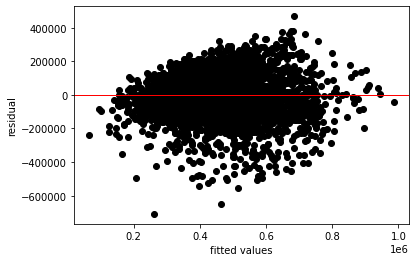

In [56]:
# Create the residual plot

plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()


The residuals are not centered close to indicating that OLS regression was not the best regression to use.

In [57]:
# Assess heteroscedasticity using bartlett's tests

import scipy as sp
from scipy.stats import stats

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')


3240.8014829587755
the variances are homogeneous!


The model passes the heteroscedasticity test meaning the varainces are equal.

However, it fails the residuals tests as the residuals are not centered close to 0.

# 8. Quantile Regression

In [220]:
# Create a linear regression model to check variance and mean.

features = ['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'yr_built', 'zipcode', 'sqft_living15']

for i, colval in enumerate(features):
  X = np.array(house_clean[colval].values.reshape(-1,1))
  y = np.array(house_clean['price'])

  lr = LinearRegression(fit_intercept=True, normalize=False)
  lr.fit(X,y)

  y_pred = lr.predict(X)
  print(f"           | {colval} |\n")
  print("Mean squared error: {0:.2f}"
        .format(np.mean((y_pred - y) ** 2)))
  print('Variance score: {0:.2f}'.format(lr.score(X, y)))
  print("\n==============================\n")

# Variance should be close to 1, since the variance is 0.00 or close to 0 in all instances, it means linear regression didn't work well

           | bedrooms |

Mean squared error: 34427899883.07
Variance score: 0.06


           | bathrooms |

Mean squared error: 32007463364.16
Variance score: 0.13


           | sqft_lot |

Mean squared error: 36491949855.22
Variance score: 0.00


           | floors |

Mean squared error: 35062970122.70
Variance score: 0.04


           | condition |

Mean squared error: 36368165222.52
Variance score: 0.01


           | grade |

Mean squared error: 26009218958.43
Variance score: 0.29


           | sqft_above |

Mean squared error: 30885044281.08
Variance score: 0.16


           | yr_built |

Mean squared error: 36517740515.88
Variance score: 0.00


           | zipcode |

Mean squared error: 36611893501.18
Variance score: 0.00


           | sqft_living15 |

Mean squared error: 28622257646.47
Variance score: 0.22




Since the variances of the features are not close to 1, it means that linear regression is not a good option for prediction

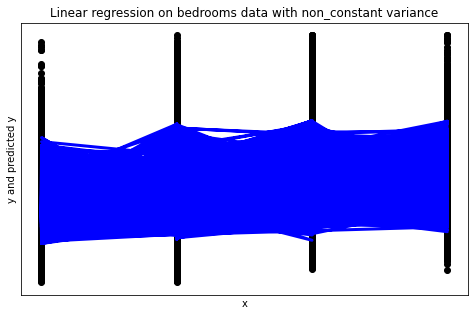

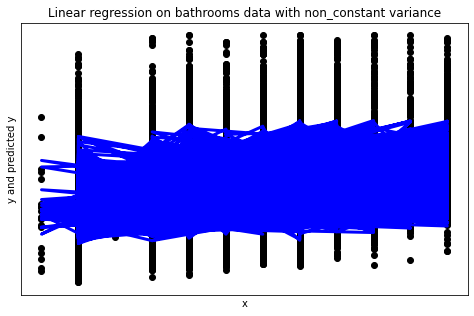

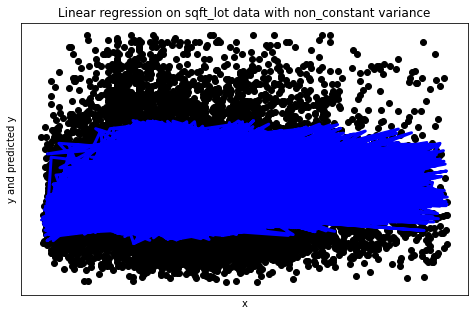

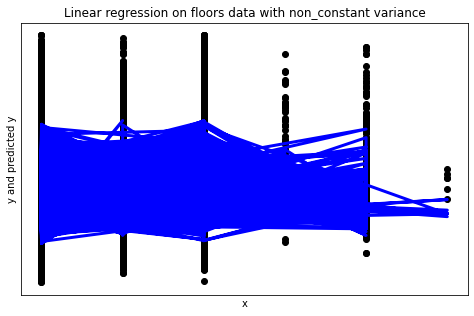

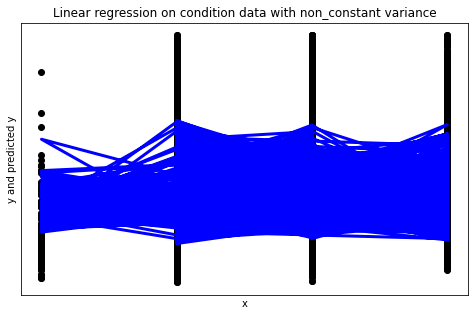

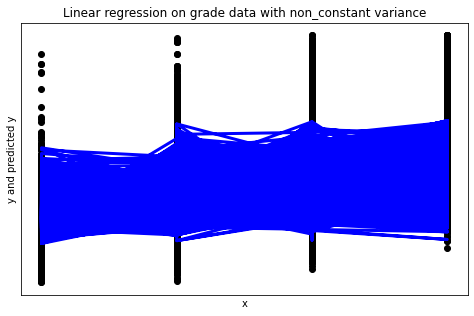

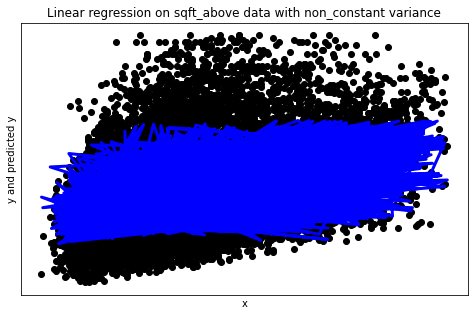

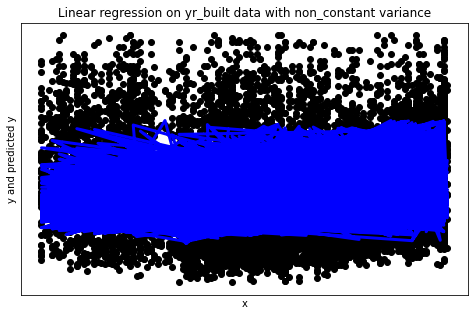

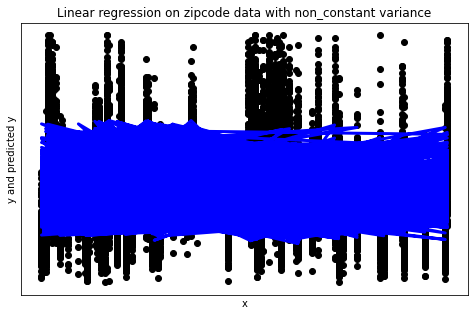

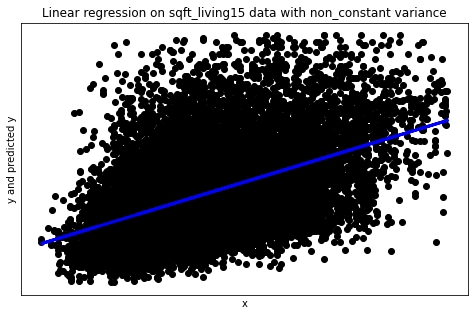

In [221]:
# Plot the regression to see the scatter of data points
#
for i, colval in enumerate(features):
  X = np.array(house_clean[colval].values.reshape(-1,1))
  y = np.array(house_clean['price'])

  figure,ax = plt.subplots(figsize=(8,5))
  
  plt.scatter(X, y, color='black')
  plt.plot(X, y_pred, color='blue',
         linewidth=3)

  plt.xticks(())
  plt.yticks(())
  plt.xlabel("x")
  plt.ylabel("y and predicted y")
  plt.title(f"Linear regression on {colval} data with non_constant variance")
  

# The line of best fit is far from perfect for the different plots

In [222]:
# Use the python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf

# Find the regression coefficients for the conditioned median, 0.5 quantile
#

for i, colval in enumerate(features):
  X = np.array(house_clean[colval].values.reshape(-1,1))
  y = np.array(house_clean['price'])

  mod = smf.quantreg('y ~ X', house_clean)
  res = mod.fit(q=.5)

# Then print out the summary of our model
#
  print(f"           | {colval} |\n")
  print(res.summary())
  print("*****************************************************************")
  print(res.params)
  print("\n==============================\n")

# The intercept and slope/coefficient of X shown in the below tables are the parameters for the 0.5th quantile of our y in the different X variables

           | bedrooms |

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:              0.02302
Model:                       QuantReg   Bandwidth:                   3.650e+04
Method:                 Least Squares   Sparsity:                    4.897e+05
Date:                Sun, 07 Jun 2020   No. Observations:                16748
Time:                        17:47:28   Df Residuals:                    16746
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    2.46e+05   8176.244     30.087      0.000     2.3e+05    2.62e+05
X             5.4e+04   2427.560     22.245      0.000    4.92e+04    5.88e+04
*****************************************************************
Intercept    246000.0
X             5400

In [223]:
## Similarly we can do the models for other quantiles
# 
quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 

for i, colval in enumerate(features):
    X = np.array(house_clean[colval].values.reshape(-1,1))
    y = np.array(house_clean['price'])
    for qt in quantiles: 
       mod = smf.quantreg('y ~ X', house_clean)
       res = mod.fit(q = qt)
       models.append(res)
       params.append([qt, res.params['Intercept'], res.params['X']] + res.conf_int().loc['X'].tolist())

# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'X_coef', 'cf_lower_bound', 'cf_upper_bound'])
params

,qt,intercept,X_coef,cf_lower_bound,cf_upper_bound
0,0.1,130000.000001,35000.000000,32190.832354,37809.167646
1,0.2,156249.999998,39750.000001,36681.343261,42818.656740
2,0.3,198366.666667,40316.666667,36506.287219,44127.046114
3,0.4,220000.000001,47500.000000,43115.177849,51884.822151
4,0.5,246000.000000,54000.000000,49241.726126,58758.273874
...,...,...,...,...,...
85,0.5,107311.377247,179.041916,172.406376,185.677456
86,0.6,126111.110881,194.444445,188.005254,200.883635
87,0.7,154875.706228,203.954802,197.335905,210.573700
88,0.8,202277.015386,210.854615,202.680751,219.028480


In [210]:
# Do a Linear regression using OLS

for i, colval in enumerate(features):
    X = np.array(house_clean[colval].values.reshape(-1,1))
    y = np.array(house_clean['price'])
    ols = smf.ols('y ~ X', house_clean).fit()
    print(f"           | {colval} |\n")
    print(ols.summary())

    param1 = ols.conf_int().loc['X'].tolist()
    lin = dict(intercept = ols.params['Intercept'],
              X_coef = ols.params['X'],
              cf_lower_bound = param1[0],
              cf_upper_bound = param1[1])
    print(ols)
    print("*****************************************************************")

           | bedrooms |

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     1076.
Date:                Sun, 07 Jun 2020   Prob (F-statistic):          7.94e-229
Time:                        16:06:21   Log-Likelihood:            -2.2694e+05
No. Observations:               16748   AIC:                         4.539e+05
Df Residuals:                   16746   BIC:                         4.539e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.568e+05   619

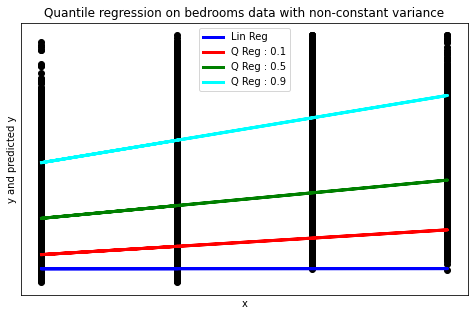

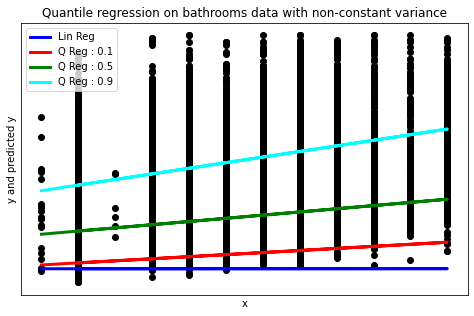

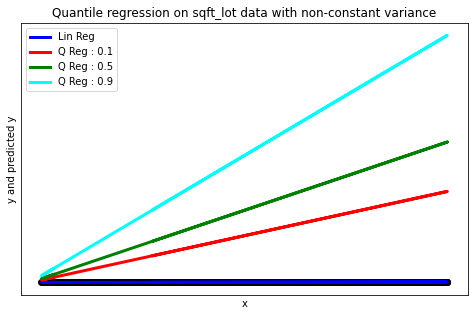

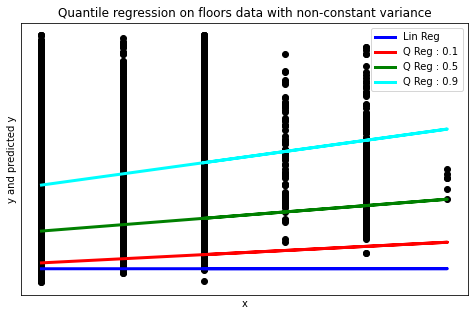

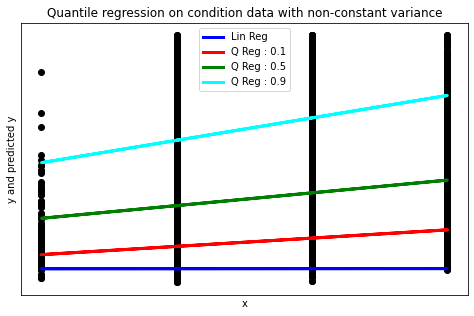

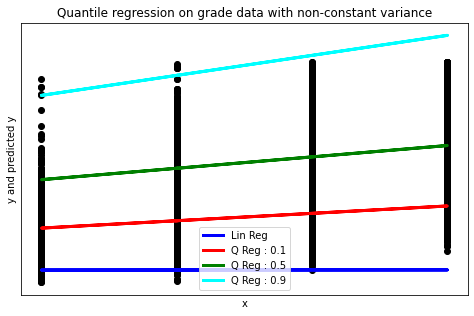

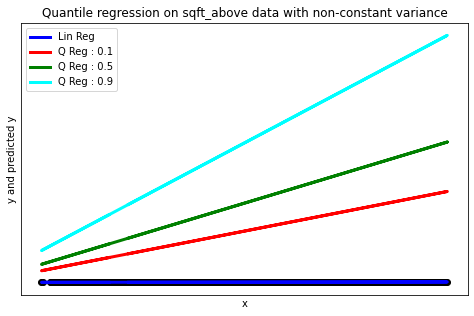

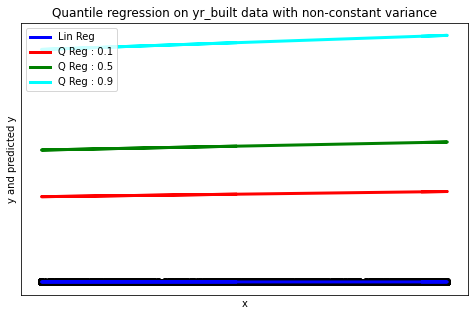

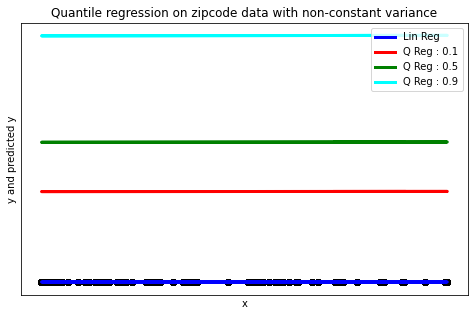

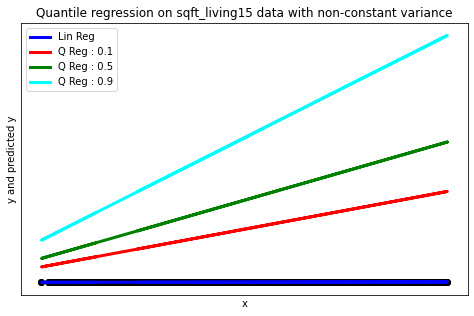

In [211]:
# Plot 0.1th, 0.5th and 0.9th quantile models against our original data.

for i, colval in enumerate(features):
  X = np.array(house_clean[colval].values.reshape(-1,1))
  y = np.array(house_clean['price'])

  figure,ax = plt.subplots(figsize=(8,5))

  plt.scatter(X, y,  color='black')

  y_pred1 = ols.params['Intercept'] + ols.params['X'] * X
  plt.plot(X, y_pred1, color='blue',
         linewidth=3, label='Lin Reg')

  y_pred2 = models[0].params['Intercept'] + models[0].params['X'] * X
  plt.plot(X, y_pred2, color='red',
         linewidth=3, label='Q Reg : 0.1')

  y_pred3 = models[4].params['Intercept'] + models[4].params['X'] * X
  plt.plot(X, y_pred3, color='green',
         linewidth=3, label='Q Reg : 0.5')


  y_pred4 = models[8].params['Intercept'] + models[8].params['X'] * X
  plt.plot(X, y_pred4, color='cyan',
         linewidth=3, label='Q Reg : 0.9')

  plt.xticks(())
  plt.yticks(())
  plt.xlabel("x")
  plt.ylabel("y and predicted y")
  plt.title(f"Quantile regression on {colval} data with non-constant variance")
  plt.legend()


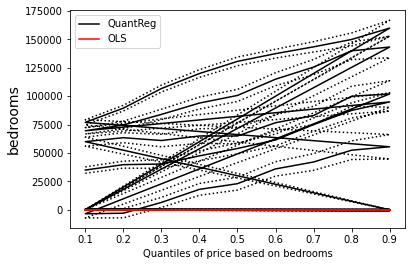

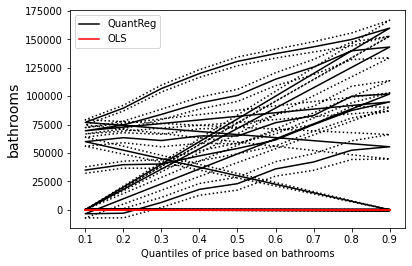

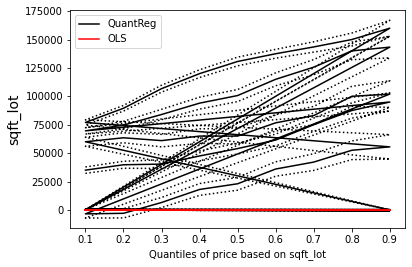

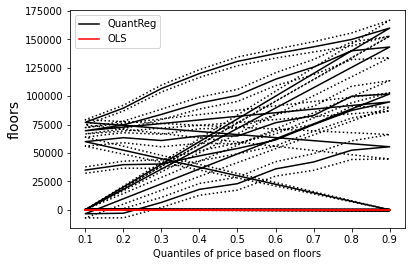

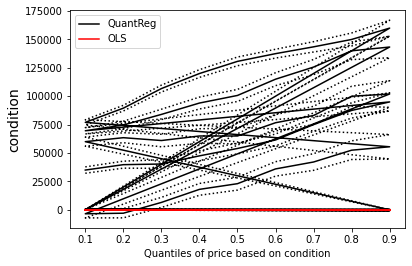

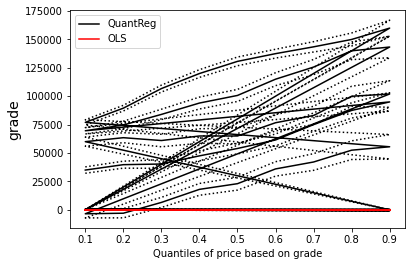

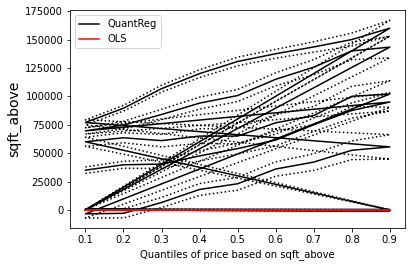

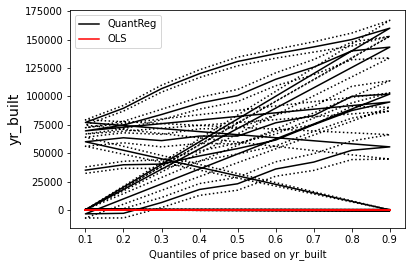

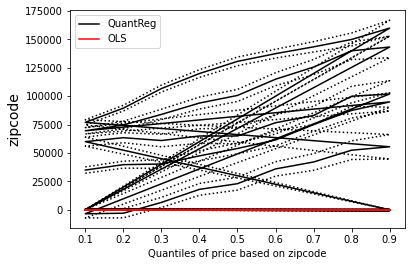

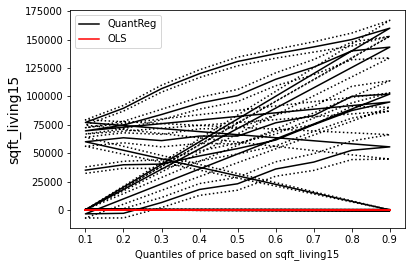

In [219]:
# Plot the changes in the quantile and OLS coeffiecients

for i, colval in enumerate(features):
  X = np.array(house_clean[colval].values.reshape(-1,1))
  y = np.array(house_clean['price'])
  n = params.shape[0]
  p1 = plt.plot(params['qt'], params['X_coef'],color='black' ,label = 'QuantReg')
  p2 = plt.plot(params['qt'], params['cf_upper_bound'], linestyle = 'dotted', color='black')
  p3 = plt.plot(params['qt'], params['cf_lower_bound'], linestyle = 'dotted', color='black')
  p4 = plt.plot(params['qt'], [lin['X_coef']]* n , color = 'red', label = 'OLS')
  p5 = plt.plot(params['qt'], [lin['cf_upper_bound']]* n , color = 'red', linestyle = 'dotted')
  p6 = plt.plot(params['qt'], [lin['cf_lower_bound']]* n , color = 'red', linestyle = 'dotted')
  plt.ylabel(f'{colval}', fontsize = 14)
  plt.xlabel(f'Quantiles of price based on {colval}')
  plt.legend()
  plt.show()

Compare confidence intervals of OLS and quantile coefficients. For all the variables, it is not very clear if the quantile coefficients fall within the OLS confidence intervals. This would have been useful in indicating whether there is a significant difference between using OLS and quantile regression.

Since the OLS confidence intervals in the plots are not too clear this regression remains inconclusive.

# 9. Ridge Regression

Ridge regression is a technique used to analyze multiple regression data that is multicollinear in nature.

I already checked for multicollinearity and removed the variables that were colinear.

The X variables I am using are not highly correlated.

In [0]:
# Set up the X and y variables

X = house_revised.iloc[:, 0:]
y = house_clean['price']

In [65]:
# Create the baseline regression model. This is a model that has no regularization to it.
# 
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X,y)
first_model = (mean_squared_error(y_true=y,y_pred=lr.predict(X)))
print(first_model)

# The output value of 18039761300.6838 will be our indicator to determine if the regularized ridge regression model is superior or not.

18039761300.683823


In [0]:
# Determine the most appropriate value for the l2 regularization using the grid

# Create the ridge model and indicate normalization in order to get better estimates.

ridge = Ridge(normalize=True)

# Set up the grid

from sklearn.model_selection import GridSearchCV

search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [67]:
# Use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X,y)
search.best_params_
{'alpha': 0.00001}
abs(search.best_score_) 

# The best_params_ tells us what to set alpha to which in this case is 0.01. 
# The best_score_ tells us what the best possible mean squared error is. 
# In this case, the value of 18179180900.3775 is worse than what the baseline model was. 

18179180900.377533

In [189]:
search.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.8}

In [190]:
# Confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.00001)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

18039761304.30532


From this we can see that the baseline linear regression model is superior to the regularized ridge regression model.

This could be so because ridge regression works best when the data is multicollinear in nature, which in my case it isn't.

In [191]:
# Find the coefficients from linear regression
coeff_house = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
coeff_house.sort_values("Coefficient", ascending = False)

,Coefficient
grade,111510.451480
bathrooms,52116.985824
condition,27534.810762
floors,8264.485465
zipcode,180.049665
sqft_living15,90.639731
sqft_above,23.098433
sqft_lot,-7.618696
bedrooms,-2589.872550
yr_built,-2974.283811


In [192]:
# Find the coefficients from ridge regression

coeff2_house = pd.DataFrame(ridge.coef_, X.columns, columns=['Coefficient'])
coeff2_house.sort_values("Coefficient", ascending = False)

,Coefficient
grade,110795.867022
bathrooms,51931.847046
condition,25151.874489
floors,8570.641573
zipcode,171.626719
sqft_living15,91.162476
sqft_above,24.006693
sqft_lot,-7.542249
bedrooms,-2507.381185
yr_built,-2982.838551


From the coefficients, we can see that the l2 regularization forces the parameters to be relatively small. 

Since the penalization was quite small, the coefficients did not reduce by a big margin

In [0]:
# Do predictions from the linear model and the ridge model fro comparison purposes

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

y1_pred = ridge.predict(X_test)

In [194]:
# Create a new dataframe comparing the actual price, linear predicted price and the ridge predicted price

new = pd.DataFrame({'Actual': y_test, 'Linear Predicted': y_pred, 'Ridge Predicted': y1_pred})
new

,Actual,Linear Predicted,Ridge Predicted
1172,360000.0,653378.914275,654850.682102
3775,300000.0,465442.954051,465120.548656
6303,339950.0,217117.290557,216043.730464
2619,553650.0,463526.787944,463127.330130
4063,405000.0,228924.551583,230811.303407
...,...,...,...
11633,759000.0,368558.249566,369799.602924
2907,411000.0,589225.385072,590895.250755
12783,345000.0,337504.117739,337484.801980
2466,395000.0,507339.451077,505963.521808


From the above comparison, we can see that linear predicted values are closer to the actual values than the ridge predicted values.

# 10. Lasso Regression

In [0]:
# Scale data

# Import StandardScaler
#
from sklearn.preprocessing import StandardScaler

# Define X and y
#
X = house_revised.iloc[:, 0:]
y = house_clean['price']

# Scaling data 
#
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [170]:
# Train lasso on the whole dataset and look at the R-squared score and the model coefficients. 
# Alpha here is already defined as 1.

# Importing linear models

from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X, y) 

# Print score, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.5076554472589979
lasso MSE: 18039761313.70379
lasso coef: [ -1951.87750083  33739.03693954 -25638.54846913   4655.85182336
  16258.04914419  90041.82239573  14333.80197792 -88301.75526374
   9297.20930573  47242.60487078]


In [76]:
# Build lasso model

# Split the data into training and test sets, build Lasso and choose the
# regularization parameter with the help of GridSearch. 

# The model with the highest R-squared score will give us the best parameters.


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

# Split data into training and test sets and choose a set of parameters 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fit models and print the best parameters, R-squared scores, MSE, and coefficients

gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)


lasso best parameters: {'alpha': 0.6}
lasso score: 0.5035968254677254
linear score: 0.5035973211222817
lasso MSE: 18486461494.301186
linear MSE: 18486443035.71885
lasso best estimator coef: [  -873.18312701  33407.13300338 -24827.84776481   4655.35605249
  17301.57187479  90044.07276757  12513.63227387 -87992.07858395
   8421.5609398   47595.4830042 ]
linear coef: [  -874.7385517   33408.32025506 -24828.23342017   4655.69078129
  17302.2237822   90044.27014325  12514.53822124 -87993.59336236
   8422.0011704   47596.09368835]


From this we can see that the linear regression model is superior to the regularized lasso regression model.

In [175]:
# Find the coefficients from linear regression

coeff_linear = pd.DataFrame(linear.coef_, house_revised.columns, columns=['Coefficient'])
coeff_linear.sort_values("Coefficient", ascending = False)

,Coefficient
grade,90044.270143
sqft_living15,47596.093688
bathrooms,33408.320255
condition,17302.223782
sqft_above,12514.538221
zipcode,8422.001170
floors,4655.690781
bedrooms,-874.738552
sqft_lot,-24828.233420
yr_built,-87993.593362


In [174]:
# Find the coefficients from lasso regression

coeff_lasso = pd.DataFrame(gridlasso.best_estimator_.coef_, house_revised.columns, columns=['Coefficient'])
coeff_lasso.sort_values("Coefficient", ascending = False)

,Coefficient
grade,90044.072768
sqft_living15,47595.483004
bathrooms,33407.133003
condition,17301.571875
sqft_above,12513.632274
zipcode,8421.560940
floors,4655.356052
bedrooms,-873.183127
sqft_lot,-24827.847765
yr_built,-87992.078584


Lasso regression helps in feature selection (identifying the most important variables) and shrinkage of coefficients towards 0 with some even becoming exactly 0.

From the coefficients, we can see that the l1 regularization forces the parameters to be relatively small. The coefficents have all reduced, though by a small margin. None has been reduced to entirely 0 though.

In [0]:
# Do predictions from the linear model and the ridge model fro comparison purposes

y_pred = linear.predict(X_test)

y1_pred = gridlasso.predict(X_test)

In [80]:
# Create a new dataframe comparing the actual price, linear predicted price and the ridge predicted price

df = pd.DataFrame({'Actual': y_test, 'Linear Predicted': y_pred, 'Gridlasso Predicted': y1_pred})
df

,Actual,Linear Predicted,Gridlasso Predicted
10368,690000.0,713771.978500,713768.916192
13355,555000.0,549713.590933,549714.610813
10994,235000.0,278953.713533,278956.508112
15615,360000.0,407774.415358,407775.249525
13184,780000.0,562803.476877,562802.192691
...,...,...,...
11429,907500.0,514398.563008,514394.868661
4626,487600.0,455302.663272,455304.091974
5572,230000.0,278424.147889,278430.406016
11110,450000.0,588983.201435,588976.972552


From the above comparison, we can see that linear predicted values are closer to the actual values than the gridlasso predicted values.

# 11. Elastic Net Regression

In [0]:
# Set up the X and y variables

X = house_revised.iloc[:, 0:]
y = house_clean['price']

In [179]:
# Creating our linear regression model for the purpose of comparison
# 
reg = LinearRegression()
reg.fit(X,y)
first_model=(mean_squared_error(y_true=y,y_pred=reg.predict(X)))
print(first_model) 

# This mean standard error score of 18039761300.6838 is our benchmark for determining 
# if the elastic net model will be better or worst. 

18039761300.683823


In [180]:
# Find coefficients from linear regression

coeff_linear = pd.DataFrame(reg.coef_, X.columns, columns=['Coefficient'])
coeff_linear.sort_values("Coefficient", ascending = False)

,Coefficient
grade,110797.812175
bathrooms,51933.027620
condition,25151.499708
floors,8570.769491
zipcode,171.619218
sqft_living15,91.162879
sqft_above,24.005942
sqft_lot,-7.542338
bedrooms,-2507.892726
yr_built,-2982.910998


In [0]:
# Build the Elastic Net Model

# Normalize the data

elastic = ElasticNet(normalize=True)

# Create the grid

search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [182]:
# Fit the model and display the best parameters and the best results we can get with this setup.

search.fit(X,y)
search.best_params_
abs(search.best_score_)

18197704161.14016

In [188]:
search.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.8}

In [196]:
# The best hyperparameters was an alpha set to 0.00001 and a l1_ratio of 0.8. 

# Set the hyperparameters to the recommended values and run on the data.

elastic=ElasticNet(normalize=True,alpha=0.00001,l1_ratio=0.80)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(second_model)  

18074840918.40871


With these settings I got an MSE of 18074840918.4087. This is above the baseline model which has an MSE of 18039761300.6838

This shows that elastic net is doing worse than linear regression. 

In [197]:
# Find coefficients from elastic net regression

coeff_elastic = pd.DataFrame(elastic.coef_, X.columns, columns=['Coefficient'])
coeff_elastic.sort_values("Coefficient", ascending = False)

,Coefficient
grade,104750.628354
bathrooms,48412.966203
condition,26163.173758
floors,8299.774078
zipcode,192.969082
sqft_living15,89.717276
sqft_above,26.139026
sqft_lot,-7.242127
bedrooms,-933.121915
yr_built,-2760.292411


From the coefficients, we can see that the regularization forces the parameters to be relatively small. 

Since the penalization was quite small, the coefficients did not reduce by a big margin but they reduced nonetheless

In [0]:
# Do predictions from the linear model and the elastic net model for comparison purposes

y_pred = reg.predict(X_test)

y1_pred = elastic.predict(X_test)

In [199]:
# Create a new dataframe comparing the actual price, linear predicted price and the elastic net predicted price

predictions = pd.DataFrame({'Actual': y_test, 'Linear Predicted': y_pred, 'Elastic Net Predicted': y1_pred})
predictions

,Actual,Linear Predicted,Elastic Net Predicted
1172,360000.0,654851.770805,651258.624596
3775,300000.0,465119.188715,469250.067627
6303,339950.0,216039.319080,229682.871280
2619,553650.0,463128.538646,459516.803120
4063,405000.0,230809.097662,238027.316318
...,...,...,...
11633,759000.0,369798.080201,374453.651587
2907,411000.0,590896.588911,586715.009235
12783,345000.0,337484.687045,338099.276678
2466,395000.0,505965.944401,498329.262906


From the above comparison, we can see that linear predicted values are closer to the actual values than the elastic net predicted values.

# Conclusion

From the models built, the regressions can be arranged in descending order from the one that makes the best predictions to the one that makes the worst predictions:

1. Ridge regression
2. Elastic net regression
3. Gridlasso regression
4. Multiple linear regression
5. Quantile regression

I have ranked them according to which model gave the lowest Mean Squared Error (MSE) with the model outputting the lowest MSE being ranked first.

Perhaps quantile regression would perfrom better had I not removed the outliers as it is mostly used when there are outliers in the data.

The topmost features that contribute largely to price prediction are as follows:
1. grade
2. bathrooms
3. condition
4. floors
5. zipcode
6. sqft_living15
7. sqft_above

The features are not ranked in any particular order. They differed with each regression but 'grade' managed to hold the first position across all regressions.

Something noteworthy is that amongst the top features gotten under LDA in multivariate analysis, 'grade' did not make it to the list. This raises the question whether the prediction I made using LDA is actually accurate.


# 12. Implementing the Solution

The prediction model I would present to Hass Company is the Ridge regression model as it proved to have the lowest mean squared error.

# 13. Challenging the Solution

The ridge regression model could however be tuned more so that it gives even more accurate predictions. 

# 14. Follow up questions 